# Access AODN High Frequency Radar Delayed Mode NetCDF files via THREDDS:

|  |  |
| ----------- | ----------- |
| Author:| Laurent Besnard |
| Edited:| Benjamin Stepin |
| Affiliation:| IMOS |
| e-mail:| info@aodn.org.au |
| Date of creation:| 5th May., 2021 |
| Date of last update:| 16th May., 2024 |

## Table of Contents
#### [Background](#background)
#### [Required Packages](#required-packages)

1. [Locate and use the OPeNDAP URL of a NetCDF file](#1-locate-and-use-the-opendap-url-of-a-netcdf-file)
    - [I. Presentation of the NetCDF content](#i-presentation-of-the-netcdf-content)
    - [II. Plot the Sea Water Velocity data](#ii-plot-the-sea-water-velocity-data)
    - [III. Plot the Sea Water Velocity data and add coastal contours](#iii-plot-the-sea-water-velocity-data-and-add-coastal-contours)
    - [IV. Quality Control flags and apply them to the dataset](#iv-quality-control-flags)
2. [Exercise](#2-exercise)

## Background
### What is Ocean Radar

Coastal currents play an important role in the distribution of heat, nutrients, larval dispersal, pollution transport and sediment redistribution. Until recently there was very little spatial data of Australian coastal currents, with direct measurements generally from single point moorings or ocean arrays. High-Frequency Ocean Radar systems are used to map surface currents at the mesoscale (generally an area of 150 Km x 150 Km), providing a valuable tool in monitoring coastal currents.

Ocean Radar works by transmitting high-frequency radar signals out to sea from shore-based antennae which are scattered by the rough sea surface. A portion of the radar is backscattered, and Doppler shifted by the motion of the waves or wind and tidal movement. The radar receivers measure the Doppler spectrum and calculate current and wave information within the range of the radar system.

The Ocean Radar facility currently uses two types of High-Frequency ocean radar: the phased array beam-forming technology (WERA), and the direction-finding technology (SeaSonde).

-> [More info](https://imos.org.au/facilities/oceanradar)

### Portal access and Help

Tutorials are available to provide a visual overview for searching, subsetting and downloading data from the AODN Portal.
More information on the [AODN portal](http://portal.aodn.org.au)

The ACORN delayed mode collection for the Turquoise Coast site can directly be accessible at the following address:
[https://portal.aodn.org.au/search?uuid=055342fc-f970-4be7-a764-8903220d42fb](https://portal.aodn.org.au/search?uuid=055342fc-f970-4be7-a764-8903220d42fb)

To have more understanding on how to directly access NetCDF files from the IMOS [THREDDS AODN server](http://thredds.aodn.org.au), please got to
[https://help.aodn.org.au/downloading-data-from-servers/opendap/](https://help.aodn.org.au/downloading-data-from-servers/opendap/)

### Required Packages

- Python - 3.10.13
- numpy - 1.26.4
- matplotlib - 3.8.4
- netCDF4 - 1.6.5
- cmocean - 4.0.3
- scipy - 1.13.0
- tabulate - 0.9.0
- cartopy - 0.23.0
- shapely - 2.0.4

In [1]:
# Run this code to install the packages
# !pip install numpy==1.26.4 matplotlib==3.8.4 netCDF4==1.6.5 cmocean==4.0.3 scipy==1.13.0 tabulate==0.9.0 cartopy==0.23.0 shapely==2.0.4

In [4]:
import numpy as np
import cmocean
import cmocean.cm as cmo
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import HTML, display
import tabulate

from netCDF4 import Dataset, num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, axes, subplot, setp

<a id="Locate"></a>
### 1. Locate and use the OPeNDAP URL of a NetCDF file
NetCDF files can be found directly on the [AODN thredds server](http://thredds.aodn.org.au/), for example http://thredds.aodn.org.au/thredds/catalog/IMOS/ACORN/gridded_1h-avg-current-map_QC/TURQ/2020/01/01/catalog.html

In order to use a NetCDF file within Python, the OPeNDAP url of a NetCDF file has to be used.

To get this url, select a NetCDF file, for example:
 * http://thredds.aodn.org.au/thredds/dodsC/IMOS/ACORN/gridded_1h-avg-current-map_QC/TURQ/2020/01/01/IMOS_ACORN_V_20200101T000000Z_TURQ_FV01_1-hour-avg.nc.html

Then Copy the URL available from the **Data URL** part, i.e.:
 * ```http://thredds.aodn.org.au/thredds/dodsC/IMOS/ACORN/gridded_1h-avg-current-map_QC/TURQ/2020/01/01/IMOS_ACORN_V_20200101T000000Z_TURQ_FV01_1-hour-avg.nc```

In [5]:
## NetCDF Opendap URL

## For this example we are using the following:
nc_opendap_url = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/ACORN/gridded_1h-avg-current-map_QC/TURQ/2020/01/01/IMOS_ACORN_V_20200101T000000Z_TURQ_FV01_1-hour-avg.nc'

## Alternatively, NetCDF files can directly be downloaded via the portal link given above in the introduction

<a id="Present"></a>
#### I. Presentation of the NetCDF content

In [6]:
with Dataset(nc_opendap_url) as nc_obj:
    print(nc_obj)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    project: Integrated Marine Observing System (IMOS)
    Conventions: CF-1.6,IMOS-1.4
    institution: Australian Coastal Ocean Radar Network (ACORN)
    title: IMOS ACORN Turqoise Coast (TURQ), one hour averaged current QC data, 2020-01-01T00:00:00Z
    instrument: CODAR Ocean Sensors/SeaSonde
    site_code: TURQ, Turqoise Coast
    ssr_Stations: Lancelin (LANC), Green Head (GHED)
    date_created: 2020-04-22T21:21:31Z
    abstract: The ACORN facility is producing NetCDF files containing vector current maps at 1 hour time interval. They are produced from radial currents in the Turquoise Coast (WA), which represent the surface sea water current component along the radial direction from a receiver antenna. Radials are calculated from the shift of the Bragg peaks in a power spectrum. They are mapped onto specific angles through a Direction-Finding algorithm and are converted into current vecto

In [7]:
with Dataset(nc_opendap_url) as nc_obj:
    print(nc_obj.variables)

{'TIME': <class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00 UTC
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
    _ChunkSizes: 1
unlimited dimensions: TIME
current shape = (1,)
filling off, 'I': <class 'netCDF4._netCDF4.Variable'>
int32 I(I)
    long_name: row index (top most value is 1)
    units: 1
    _ChunkSizes: 60
unlimited dimensions: 
current shape = (60,)
filling off, 'J': <class 'netCDF4._netCDF4.Variable'>
int32 J(J)
    long_name: column index (left most value is 1)
    units: 1
    _ChunkSizes: 59
unlimited dimensions: 
current shape = (59,)
filling off, 'LATITUDE': <class 'netCDF4._netCDF4.Variable'>
float64 LATITUDE(I, J)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    valid_min: -90.0
    valid_max: 90.0
    

In [8]:
## Time values are converted into numbers inside a NetCDF file to use less space. Their values need to be converted to be humanly understood
## Below is an example on how this is done
with Dataset(nc_opendap_url) as nc_obj:
    time =  nc_obj.variables['TIME']
    print(time)

    print('\nFirst time value as an example: {timeval}'.format(timeval=num2date(time[0], time.units, time.calendar).strftime('%d/%m/%Y')))

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00 UTC
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
    _ChunkSizes: 1
unlimited dimensions: TIME
current shape = (1,)
filling off

First time value as an example: 01/01/2020


<a id="Plot"></a>
#### II. Plot the Sea Water Velocity data

C:\Users\bstepin\AppData\Local\Temp\ipykernel_3940\1821790876.py:17: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pcolor(lon[:],lat[:], speed,  cmap=lightcmap, shading='auto')
C:\Users\bstepin\AppData\Local\Temp\ipykernel_3940\1821790876.py:18: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = colorbar()


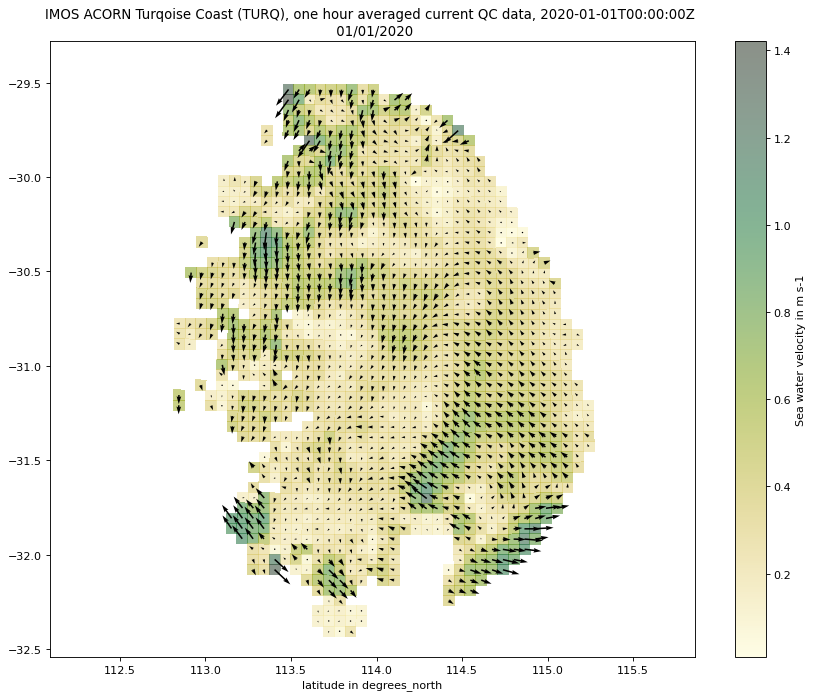

In [9]:
## plot the velocity and direction
with Dataset(nc_opendap_url) as nc_obj:
    time_index = 0 
    time =  nc_obj['TIME']
    lat = nc_obj['LATITUDE']
    lon = nc_obj['LONGITUDE']
    
    # sea water U and V components
    u_cur = nc_obj['UCUR'][time_index,:,:]
    v_cur = nc_obj['VCUR'][time_index,:,:]
    speed = np.sqrt(u_cur**2 + v_cur**2)  # converting u_cur and v_cur into sea water velocity
    
    figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
    
    # plot sea water velocity
    lightcmap = cmocean.tools.lighten(cmo.speed, 0.5)   # see https://matplotlib.org/cmocean/
    pcolor(lon[:],lat[:], speed,  cmap=lightcmap, shading='auto')
    cbar = colorbar()
    cbar.ax.set_ylabel('Sea water velocity in {units}'.format(
        units=nc_obj['UCUR'].units))

    title('{nc_title} \n {time_value}'.format(nc_title=nc_obj.title,
                                              time_value=num2date(time[time_index], time.units, time.calendar).strftime('%d/%m/%Y')
                                             ))
    xlabel('{long_name} in {units}'.format(long_name=lon.long_name,
                                           units=lon.units))
    xlabel('{long_name} in {units}'.format(long_name=lat.long_name,
                                           units=lat.units))
    
    # plot velocity field
    Q = quiver( lon[:], lat[:], u_cur, v_cur, units='width')
    show()   

<a id="PlotCont"></a>
#### III. Plot the Sea Water Velocity data and add coastal contours

C:\Users\bstepin\AppData\Local\Temp\ipykernel_3940\2485833484.py:27: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = figure1.colorbar(img)


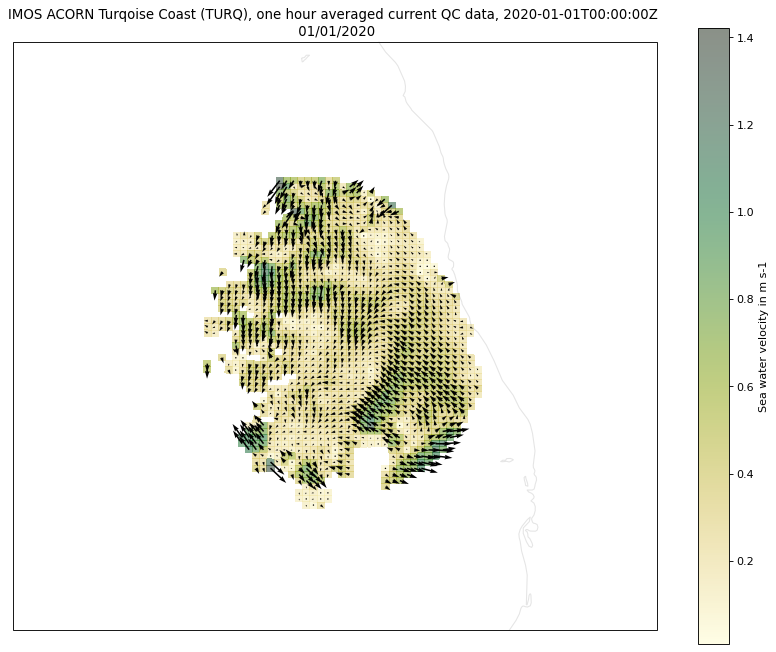

In [10]:
with Dataset(nc_opendap_url) as nc_obj:
    time_index = 0
    time =  nc_obj['TIME']
    lat = nc_obj['LATITUDE']
    lon = nc_obj['LONGITUDE']
    
    # sea water U and V components
    u_cur = nc_obj['UCUR'][time_index,:,:]
    v_cur = nc_obj['VCUR'][time_index,:,:]
    speed = np.sqrt(u_cur**2 + v_cur**2)  # converting u_cur and v_cur into sea water velocity
    
    figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
    
    ## set coastlines
    ax = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.coastlines('10m', alpha=0.1)
    
    # set extents
    delta_degrees = 1  # a delta value in degree to increase the extent of the map
    extent = [ np.min(lon[:]) - delta_degrees , np.max(lon[:]) + delta_degrees, np.min(lat[:]) - delta_degrees, np.max(lat[:]) + delta_degrees]
    ax.set_extent(extent, ccrs.PlateCarree())
    
    # plot sea water velocity
    lightcmap = cmocean.tools.lighten(cmo.speed, 0.5)  # see https://matplotlib.org/cmocean/
    img = ax.pcolor(lon[:],lat[:], speed, cmap=lightcmap, transform=ccrs.PlateCarree())
    
    cbar = figure1.colorbar(img)
    cbar.ax.set_ylabel('Sea water velocity in {units}'.format(
        units=nc_obj.variables['UCUR'].units))

    title('{nc_title} \n {time_value}'.format(nc_title=nc_obj.title,
                                              time_value=num2date(time[time_index], time.units, time.calendar).strftime('%d/%m/%Y')
                                             ))
    xlabel('{long_name} in {units}'.format(long_name=lon.long_name,
                                           units=lon.units))
    xlabel('{long_name} in {units}'.format(long_name=lat.long_name,
                                           units=lat.units))
    
    # plot velocity field
    Q = quiver( lon[:], lat[:], u_cur, v_cur, units='width', transform=ccrs.PlateCarree())
    show()

## 2. Using the NetCDF Quality Control Flags and understanding their impact 


In [11]:
with Dataset(nc_opendap_url) as nc_obj:
    u_cur_qc_flags = nc_obj['UCUR_quality_control']
    
    table =  np.transpose([u_cur_qc_flags.flag_values, u_cur_qc_flags.flag_meanings.split(' ')])
    display(HTML(tabulate.tabulate(table, headers=['flag_values', 'flag_meanings'], tablefmt='html') ))

flag_values,flag_meanings
0,no_qc_performed
1,good_data
2,probably_good_data
3,bad_data_that_are_potentially_correctable
4,bad_data
5,value_changed
6,not_used
7,not_used
8,interpolated_values
9,missing_values


<a id="QCFlags"></a>
#### IV. Quality Control flags
In the next part, only the ```['good_data']``` and ```'bad_data']``` will be plotted next to each others to see the differences

C:\Users\bstepin\AppData\Local\Temp\ipykernel_3940\2412163841.py:49: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  curr_good = ax1.pcolor(lon[:],lat[:], speed_good,  cmap=lightcmap)
C:\Users\bstepin\AppData\Local\Temp\ipykernel_3940\2412163841.py:57: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  ax2.pcolor(lon[:],lat[:], speed_bad,  cmap=lightcmap)
C:\Users\bstepin\AppData\Local\Temp\ipykernel_3940\2412163841.py:71: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D arr

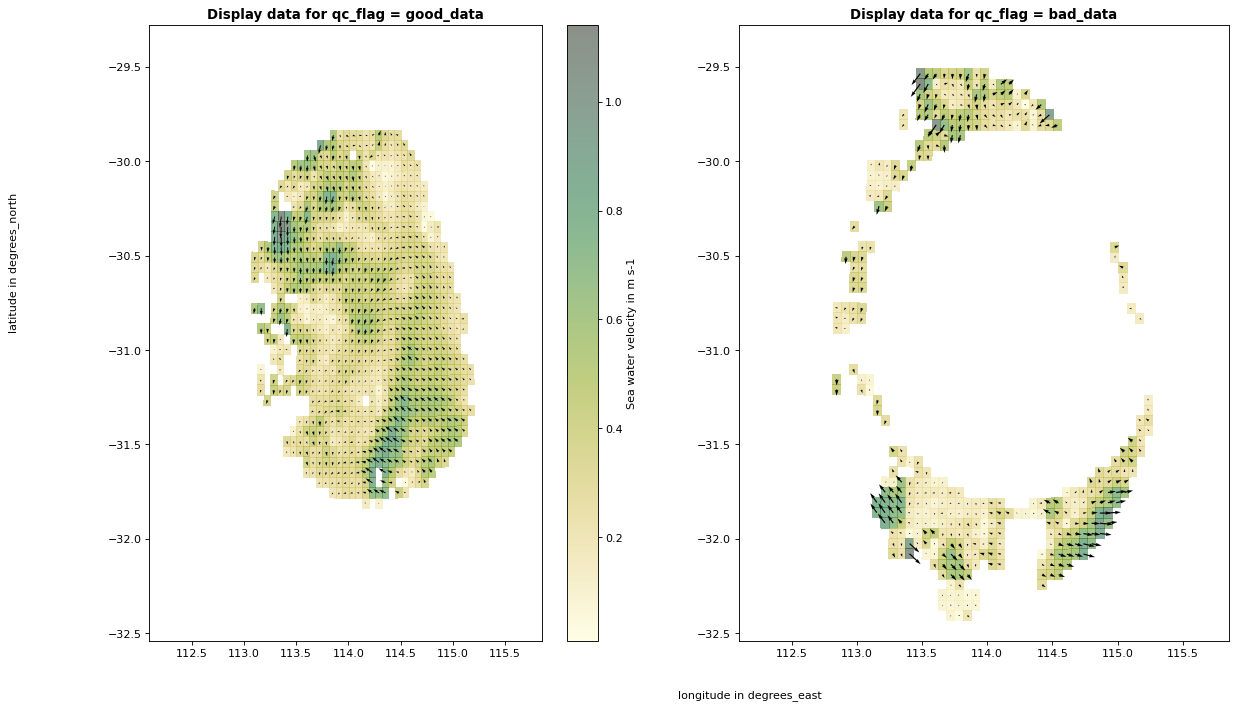

In [12]:
## plot the velocity and direction

# creation of quick function to fitler data
def data_filtered(nc_opendap_url, qc_flag_val_to_keep):
    with Dataset(nc_opendap_url) as nc_obj:
        time_index = 0 

        u_cur_qc_flags_idx = nc_obj['UCUR_quality_control'][:] == qc_flag_val_to_keep # filtering qc_flag variable equal to qc_flag_val_to_keep
        v_cur_qc_flags_idx = nc_obj['VCUR_quality_control'][:] == qc_flag_val_to_keep

        u_cur = nc_obj['UCUR'][:]
        u_cur[~u_cur_qc_flags_idx] = nc_obj['UCUR']._FillValue  # applying FillValue to values not matching the data we want to keep
        u_cur = np.ma.masked_values(u_cur, nc_obj['UCUR']._FillValue)  # convert FillValues to Masked values
        u_cur = u_cur[time_index,:,:]  # reshape u_cur to be of dimension [dim(lat), dim(lon)] rather than  [1, dim(lat), dim(lon)]

        v_cur = nc_obj['VCUR'][:]
        v_cur[~v_cur_qc_flags_idx] = nc_obj['VCUR']._FillValue
        v_cur = np.ma.masked_values(v_cur, nc_obj['VCUR']._FillValue)
        v_cur = v_cur[time_index,:,:]

        speed = np.sqrt(u_cur**2 + v_cur**2)  # converting u_cur and v_cur into sea water velocity
        
        return u_cur, v_cur, speed
    

# good data
good_qc_flag_val = 1
u_curr_good, v_curr_good, speed_good = data_filtered(nc_opendap_url, good_qc_flag_val)

# bad data
bad_qc_flag_val = 4
u_curr_bad, v_curr_bad, speed_bad = data_filtered(nc_opendap_url, bad_qc_flag_val)

# initiate the figure and subplots
figure1 = figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
axes = figure1.subplots(1, 2)    
ax1 = axes[0]
ax2 = axes[1]

with Dataset(nc_opendap_url) as nc_obj:
    time_index = 0 

    time =  nc_obj['TIME']
    lat = nc_obj['LATITUDE']
    lon = nc_obj['LONGITUDE']

    # plot good sea water velocity
    lightcmap = cmocean.tools.lighten(cmo.speed, 0.5)   # see https://matplotlib.org/cmocean/
    curr_good = ax1.pcolor(lon[:],lat[:], speed_good,  cmap=lightcmap)

    # plot good velocity field
    Q = ax1.quiver( lon[:], lat[:], u_curr_good, v_curr_good, units='width')
    ax1.set_title('Display data for qc_flag = {qc_flag_meaning}'.format(
        qc_flag_meaning=nc_obj['UCUR_quality_control'].flag_meanings.split(' ')[good_qc_flag_val]), fontweight="bold")

    # plot bad sea water velocity
    ax2.pcolor(lon[:],lat[:], speed_bad,  cmap=lightcmap)
    
    # plot bad velocity field
    Q = ax2.quiver( lon[:], lat[:], u_curr_bad, v_curr_bad, units='width')
    ax2.set_title('Display data for qc_flag = {qc_flag_meaning}'.format(
        qc_flag_meaning=nc_obj['UCUR_quality_control'].flag_meanings.split(' ')[bad_qc_flag_val]), fontweight="bold")

    # add labels, colorbar ....
    figure1.text(0.5, 0.04,'{long_name} in {units}'.format(long_name=lon.long_name,
                                                           units=lon.units), ha='center')
    figure1.text(0.04, 0.5,'{long_name} in {units}'.format(long_name=lat.long_name,
                                                           units=lat.units), ha='center', rotation='vertical')

    figure1.subplots_adjust(right=0.8)
    cbar = figure1.colorbar(curr_good)
    cbar.ax.set_ylabel('Sea water velocity in {units}'.format(
        units=nc_obj['UCUR'].units))
    show()

<a id="Exercise"></a>
## 2. Exercise:

Here is a sample code for you to edit and test the code for yourself.

Plot the ```sea surface swell wave significant height``` from this NetCDF file:
 * http://thredds.aodn.org.au/thredds/dodsC/Department_of_Transport-Western_Australia/Waverider_Buoys/DELAYED/Coral_Bay/COR48/DOT-WA_W_20041231T160000Z_COR48_WAVERIDER_FV01_END-20050330T000000Z.nc.html


In [ ]:
# Replace the URL with the correct URL from the aodn thredds server. You can navigate to a different one to the one provided above if you liek:
nc_opendap_url = 'http://thredds.aodn.org.au/thredds/dodsC/ADD_CORRECT_PATH'

with Dataset(nc_opendap_url) as nc_obj:
    print(nc_obj)

In [ ]:
variable_name = 'RENAME_WITH_PROPER_VALUE'

In [ ]:
from matplotlib.dates import MONTHLY, DateFormatter, rrulewrapper, RRuleLocator

with Dataset(nc_opendap_url) as nc_obj:
    var_to_plot = nc_obj[variable_name]  # TODO: fill up variable name
    time =  nc_obj['TIME']
    timeData = num2date(time[:], time.units, time.calendar)   # one value per profile

    ax = subplot(111)
    plt.plot(time, var_to_plot)

    rule = rrulewrapper(MONTHLY, bymonthday=1, interval=1)
    formatter = DateFormatter('%d/%m/%y')
    loc = RRuleLocator(rule)

    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(formatter)
    labels = ax.get_xticklabels()
    setp(labels, rotation=30, fontsize=10)
    
    xlabel(time.long_name  + ' in ' +  'dd/mm/yy' )
    ylabel(var_to_plot.long_name  + ' in ' +  var_to_plot.units)
    print(max(timeData))

What are the latitude and longitude values?

In [ ]:
# Alternatively, this can be achieved with Xarray. but more about it in the next notebook
import xarray as xr
with xr.open_dataset(nc_opendap_url) as nc_obj:
  nc_obj[variable_name].plot()